In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Loading in the california dataset 
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
# Extract the DataFrame containing the data and the target
california_df = california_housing.frame
#print(california_housing.DESCR)

The features are median income in the block group, median house age in block group, average number of rooms per houeshold, average number of bedrooms per household, block group population, average number of household members, block group latitude, and block group longtitude

The target variable is the median house value in the block. Since median house value is a continuous variable, we are considering a supervised ML problem which can be solved using regresssion based techniques. Here, I use Linear Regression with a MSE cost function.

In [30]:
#Separating out the Data with the output (Median House Value in the Block)
X = california_df.drop({"MedHouseVal"}, axis = 1)
y = california_df["MedHouseVal"]

In [35]:
#Checking for any missing values in any of the feature columns
print(np.isnan(X).sum())
print(np.isnan(y).sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
0


In [44]:
#Presenting a short description of the features using the df.describe() method
y.describe()
X.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


We have a total of 20640 observations. The mean income is 3.87 (Expressed in $100,000), and the average house is 38 years old, and has 5.4 rooms. On average, 3 people live in each house, and each house has on average 1.09 bedrooms only. The average house price is $200,000. The data doesn't have any time dimension, and can be considered as a cross-sectional survey at a block level (A block is a geographical unit, and each block has on average 1400 persons). Below, I check for whether any 2 features are pairwise highly correlated. Average number of rooms shows reasonable correlation with income, and latitude is extrmely negatively correlated with the longitude, but apart from those two examples, no two features appear to be significantly correlated.  

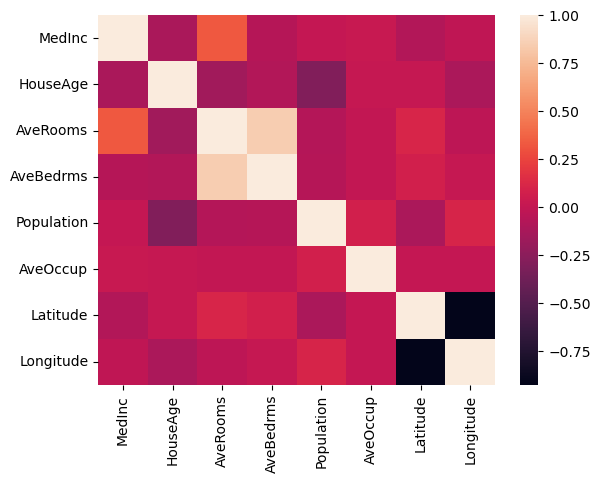

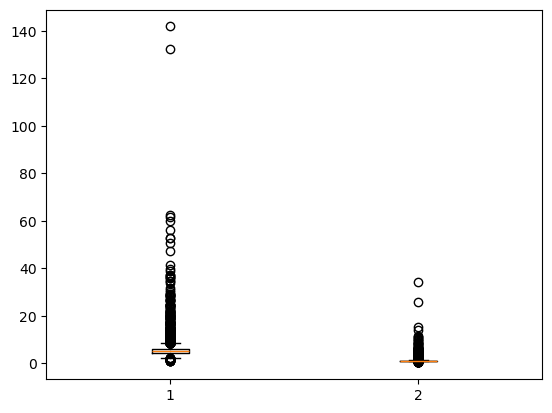

In [60]:
#Now we check for high multicollinearity between the features. We do this by checking the correlation matrix between the features. 
sns.heatmap(X.corr())
plt.show()
#Plotting scatter plots of Average rooms and Average number of bedrooms 
plt.boxplot(X[["AveRooms", "AveBedrms"]])
#To remove the outliers, I calculate the interquartile range
q3_rooms = np.quantile(X["AveRooms"], q = 0.75)
q3_bedrooms = np.quantile(X["AveBedrms"], q = 0.75)

q1_rooms = np.quantile(X["AveRooms"], q = 0.25)
q1_bedrooms = np.quantile(X["AveBedrms"], q = 0.25)

IQR_rooms = q3_rooms - q1_rooms
IQR_bedrooms = q3_bedrooms - q1_bedrooms

#There appear to be 2 outliers in the number of rooms - we set these values to NaN


plt.show()
